# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- 윈도우, mac(intell)
    - conda install selenium
    - pip install selenium
- chromedriver

In [4]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip list : grep sele

Package              Version
-------------------- ------------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
async-generator      1.10
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.10.0
bleach               4.1.0
Bottleneck           1.3.2
branca               0.4.2
brotlipy             0.7.0
certifi              2021.10.8
cffi                 1.15.0
charset-normalizer   2.0.12
colorama             0.4.4
cryptography         36.0.1
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.3
et-xmlfile           1.1.0
folium               0.12.1.post1
fonttools            4.25.0
googlemaps           2.5.1
h11                  0.13.0
idna                 3.3
importlib-metadata   4.8.2
ipykernel            6.4.1
ipython              7.31.1
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.18.1
Jinja2               3.0.2
joblib               1.1.0
j

In [2]:
from selenium import webdriver

In [7]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://www.naver.com')  # 네이버창 호출

C:\Users\jcc96\AppData\Local\Temp/ipykernel_58012/1193016497.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')


## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [2]:
from selenium import webdriver
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

C:\Users\jcc96\AppData\Local\Temp/ipykernel_25376/1154099016.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')


In [17]:
driver.get(url)  # 위에걸 실행하고 창을 켜놨을때는 작동하는데, 창을 끄고 하면 작동이 안됨. 왜지??

- 문제
    - 1. 해당 URL로 한 번에 접근이 안됩니다.
    - 2. 메인 페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [18]:
# 팝업창으로 화면 전환 
driver.switch_to_window(driver.window_handles[-1]) # 팝업창이 안떠서 실행 안된듯

AttributeError: 'WebDriver' object has no attribute 'switch_to_window'

In [19]:
# 팝업창 닫아주기
driver.close()

In [20]:
메인화면 창으로 전환
driver.switch_to_window(driver.window_handles[-1])

AttributeError: 'WebDriver' object has no attribute 'switch_to_window'

In [22]:
# 접근 url 다시 요청
driver.get(url)

InvalidSessionIdException: Message: invalid session id
Stacktrace:
Backtrace:
	Ordinal0 [0x012669A3+2582947]
	Ordinal0 [0x011FA6D1+2139857]
	Ordinal0 [0x010F3960+1063264]
	Ordinal0 [0x01114BF0+1199088]
	Ordinal0 [0x01138440+1344576]
	Ordinal0 [0x01136358+1336152]
	Ordinal0 [0x01135EF8+1335032]
	Ordinal0 [0x010D5357+938839]
	Ordinal0 [0x010D58D3+940243]
	Ordinal0 [0x010D5C1A+941082]
	GetHandleVerifier [0x0140BE02+1675858]
	GetHandleVerifier [0x014C036C+2414524]
	GetHandleVerifier [0x012FBB01+560977]
	GetHandleVerifier [0x012FA8D3+556323]
	Ordinal0 [0x0120020E+2163214]
	Ordinal0 [0x010D50D5+938197]
	Ordinal0 [0x010D4AA8+936616]
	GetHandleVerifier [0x014E807C+2577612]
	BaseThreadInitThunk [0x75CBFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77DF7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77DF7A6E+238]


In [58]:
import time
from selenium import webdriver

def main_get():
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome('../driver/chromedriver.exe')
    driver.get(url)

    time.sleep(3) # 3초 기다림
    driver.get(url)
    

In [43]:
main_get() # 왜 멋대로 닫히는거지?

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/3960915183.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')


In [1]:

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

time.sleep(3) # 3초 기다림
driver.get(url)

NameError: name 'webdriver' is not defined

In [60]:
# 지역: 시/도

sido_list_raw = driver.find_element_by_id('SIDO_NM0')
sido_list_raw.text

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/1433453196.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  sido_list_raw = driver.find_element_by_id('SIDO_NM0')


'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [61]:
len(sido_list_raw.find_elements_by_tag_name('option')) # 여러개를 고를려면 꼭 find_element 가 아닌 find_elements 를 써야한다!  /  길이 확인
sido_list = sido_list_raw.find_elements_by_tag_name('option')
len(sido_list), sido_list[1].text # 확인작업

C:\Users\jcc96\anaconda3\envs\ds_study\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  warnings.warn("find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead")


(18, '서울')

In [62]:
sido_list[1].get_attribute('value') # 속성값 가져오기

'서울특별시'

In [63]:
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [64]:
sido_names = [option.get_attribute('value') for option in sido_list] # 위에걸 한줄로 표현. 
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [65]:
# 맨 앞에 빈칸을 제거
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [66]:
sido_names[0]

'서울특별시'

In [78]:
sido_list_raw.send_keys(sido_names[16]) # 17 번째 value 값인 제주도가 검색창에 들어감

In [83]:
# 구

gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0') # 부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name('option') # 자식 태그

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/1985650961.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0') # 부모 태그


(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [84]:
gu_list_raw.send_keys(gu_names[15])

In [89]:
# 엑셀 저장

driver.find_element_by_css_selector('#glopopd_excel').click() # css 이용

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/1917593827.py:3: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('#glopopd_excel').click()


In [90]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click() # xpath 이용

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/2882683663.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()


In [91]:
element_get_excel = driver.find_element_by_id('glopopd_excel')
element_get_excel.click()

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/3849016608.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element_get_excel = driver.find_element_by_id('glopopd_excel')


In [93]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [97]:
import time
from tqdm import tqdm_notebook # tqdm 이 깔려있지 않다고 오류가 떠서 위에서 다시 재설치하고 내려옴

for gu in tqdm_notebook(gu_names): # 반복문이 어디까지 진행됐는지 확인이 가능한 툴 tqdm
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span')
    element_get_excel.click()
    time.sleep(3)

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/226032472.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names): # 반복문이 어디까지 진행됐는지 확인이 가능한 툴 tqdm


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/226032472.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id('SIGUNGU_NM0')
C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/226032472.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span')


In [ ]:
# 다운로드 경로를 정해주고, 파일 이름을 각 시와 구 로 구분이 되게 rename 해서 저장해주면 좋을 것 같다.

In [98]:
driver.close()

## 4. 데이터 정리하기

In [99]:
import pandas as pd
from glob import glob

In [100]:
# 파일 목록 한 번에 가져오기
glob('../data/지역_*.xls') # 지역_ 가 포함되어있는 엑셀파일 전부 호출

# 순서가 뒤죽박죽으로 읽는데 어떤식으로 읽어오는거지?

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [101]:
# 파일명 저장
stations_files = glob('../data/지역_*.xls')
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [103]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2) # 엑셀파일을 열어보면 1,2째 줄에 내용이 없으므로 haeder = 2를 통해 3번째 줄부터 불러와야한다.
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
12,서울특별시,(주)소모에너지 성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1918,1758,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1978,1798,1450


In [108]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시         지에스칼텍스㈜ 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 3   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 4   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 5   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 6   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 7   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 8   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 9   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 10  서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 11  서울특별시               천호현대주유소           서울 강동구 천중로 67 (천호동)  현대오일뱅크   
 12  서울특별시        (주)소모에너지 성내주유소      

- 형식이 동일하고 연달아 붙이기만 하면 될 떄는 concat

In [107]:
stations_raw = pd.concat(tmp_raw) # 데이터 프레임 형식으로 바꿔서 붙여줌
stations_raw

# rows 는 469개인데 마지막 번호가 36인걸 봐서 무언가 숫자가 반복되면서 문제가 생겼음을 인지해야한다.
# 하지만 어떤 이유에서 이렇게 index가 매겨지는지는 모르겠다. 

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1769,1599,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1793,1657,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1958,1808,1659,1345
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1810,1650,1300
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1815,1660,-
...,...,...,...,...,...,...,...,...,...,...
32,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2498,2298,2054,1599
33,서울특별시,제이제이주유소,서울 강남구 언주로 716,현대오일뱅크,02-518-5631,N,2565,2375,2235,-
34,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-
35,서울특별시,경원주유소,서울 강남구 도산대로 428 (청담동),S-OIL,02-517-1957,N,-,-,-,-


In [109]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      469 non-null    object
 1   상호      469 non-null    object
 2   주소      469 non-null    object
 3   상표      469 non-null    object
 4   전화번호    469 non-null    object
 5   셀프여부    469 non-null    object
 6   고급휘발유   469 non-null    object
 7   휘발유     469 non-null    object
 8   경유      469 non-null    object
 9   실내등유    469 non-null    object
dtypes: object(10)
memory usage: 40.3+ KB


In [110]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [111]:
# 필요한 index 만 뽑아서 새롭게 데이터 프레임 구성
stations = pd.DataFrame({
    '상호' : stations_raw['상호'],
    '주소' : stations_raw['주소'],
    '가격' : stations_raw['휘발유'],
    '셀프' : stations_raw['셀프여부'],
    '상표' : stations_raw['상표'],
    
})
stations.tail()

,상호,주소,가격,셀프,상표
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298,N,GS칼텍스
33,제이제이주유소,서울 강남구 언주로 716,2375,N,현대오일뱅크
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지


In [113]:
stations['주소']

0     서울특별시 강동구  천호대로 1246 (둔촌제2동)
1            서울 강동구 구천면로 357 (암사동)
2           서울 강동구 양재대로 1323 (성내동)
3             서울 강동구 동남로 811 (명일동)
4           서울 강동구 천호대로 1456 (상일동)
                  ...             
32           서울 강남구 봉은사로 433 (삼성동)
33                  서울 강남구 언주로 716
34       서울특별시 강남구  봉은사로 311 (논현동)
35           서울 강남구 도산대로 428 (청담동)
36            서울 강남구 삼성로 521 (삼성동)
Name: 주소, Length: 469, dtype: object

In [118]:
for eachAddress in stations['주소']:
    print(eachAddress.split()[1])  # index = 1 에 담긴 구 데이터만 추출한다.

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북

In [120]:
stations['주소']

0     서울특별시 강동구  천호대로 1246 (둔촌제2동)
1            서울 강동구 구천면로 357 (암사동)
2           서울 강동구 양재대로 1323 (성내동)
3             서울 강동구 동남로 811 (명일동)
4           서울 강동구 천호대로 1456 (상일동)
                  ...             
32           서울 강남구 봉은사로 433 (삼성동)
33                  서울 강남구 언주로 716
34       서울특별시 강남구  봉은사로 311 (논현동)
35           서울 강남구 도산대로 428 (청담동)
36            서울 강남구 삼성로 521 (삼성동)
Name: 주소, Length: 469, dtype: object

In [121]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']] # 주소에서 각 구만 뽑아서 구 컬럼을 만들고 추가시켜준다.
stations 

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1793,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298,N,GS칼텍스,강남구
33,제이제이주유소,서울 강남구 언주로 716,2375,N,현대오일뱅크,강남구
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구


In [122]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [ ]:
# stations[stations['구'] == '서울특별시']
# stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
# stations[stations['구'] == '특별시']
# stations.loc[stations['구'] == '특별시', '구'] = '도봉구'

# 여기가 잘 이해가 안가긴 함

In [123]:
# 가격 데이터형 변환 object => float

stations['가격'] = stations['가격'].astype('float')  # astype 을 이용해 기존 object(문자열) 을 float으로 바꿔줌

ValueError: could not convert string to float: '-'

In [124]:
# 가격 정보가 빈 곳이 있었고 그곳에 가격대신 '-' 가 채워져 있었다.

stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
34,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
35,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구
36,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [125]:
# 가격 정보가 있는 주유소만 사용

stations = stations[stations['가격'] != '-']
stations.tail()

,상호,주소,가격,셀프,상표,구
29,갤러리아주유소,서울 강남구 압구정로 426,2243,N,SK에너지,강남구
30,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2284,N,GS칼텍스,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2285,N,SK에너지,강남구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298,N,GS칼텍스,강남구
33,제이제이주유소,서울 강남구 언주로 716,2375,N,현대오일뱅크,강남구


In [127]:
# 다시 float으로 변환 진행
stations['가격'] = stations['가격'].astype('float')

C:\Users\jcc96\AppData\Local\Temp/ipykernel_65764/786094376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [128]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      462 non-null    object 
 1   주소      462 non-null    object 
 2   가격      462 non-null    float64
 3   셀프      462 non-null    object 
 4   상표      462 non-null    object 
 5   구       462 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.3+ KB


In [129]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1793.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808.0,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810.0,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
29,갤러리아주유소,서울 강남구 압구정로 426,2243.0,N,SK에너지,강남구
30,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2284.0,N,GS칼텍스,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298.0,N,GS칼텍스,강남구


In [130]:
# 인덱스 재정렬

stations.reset_index(inplace=True)
stations.tail()

# 이번에는 index 값이 461까지 총 462개 잘 찍혀있음을 확인 가능하다.

,index,상호,주소,가격,셀프,상표,구
457,29,갤러리아주유소,서울 강남구 압구정로 426,2243.0,N,SK에너지,강남구
458,30,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2284.0,N,GS칼텍스,강남구
459,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
460,32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298.0,N,GS칼텍스,강남구
461,33,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구


In [131]:
# 이제 원래 있던 33번이 마지막으로 되어있는 잘못된 index 를 지워준다.
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1769.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1793.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1808.0,N,GS칼텍스,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1810.0,Y,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1815.0,Y,GS칼텍스,강동구


In [132]:
stations.tail()

,상호,주소,가격,셀프,상표,구
457,갤러리아주유소,서울 강남구 압구정로 426,2243.0,N,SK에너지,강남구
458,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2284.0,N,GS칼텍스,강남구
459,SK논현주유소,서울 강남구 논현로 747 (논현동),2285.0,N,SK에너지,강남구
460,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2298.0,N,GS칼텍스,강남구
461,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구


### 5. 주유 가격 정보 시각화

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkown system')
    

       

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

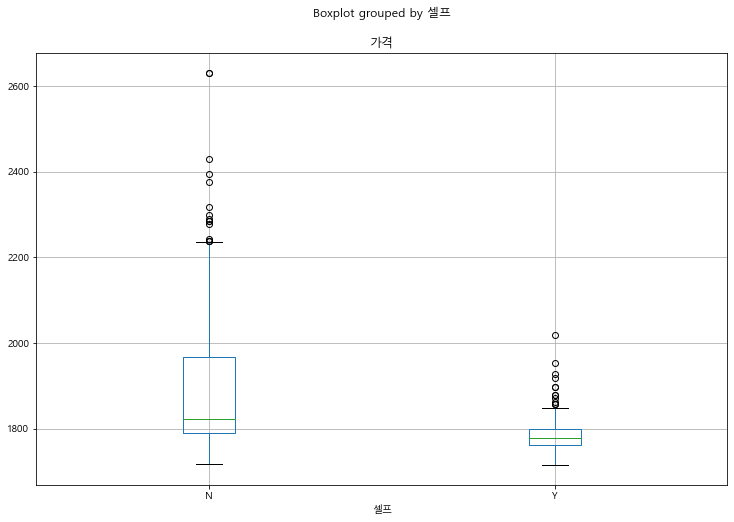

In [145]:
# boxplot(feat. pandas)

stations.boxplot(column='가격', by='셀프', figsize=(12,8)) # 박스 플롯 가져온다

# 해석 중요

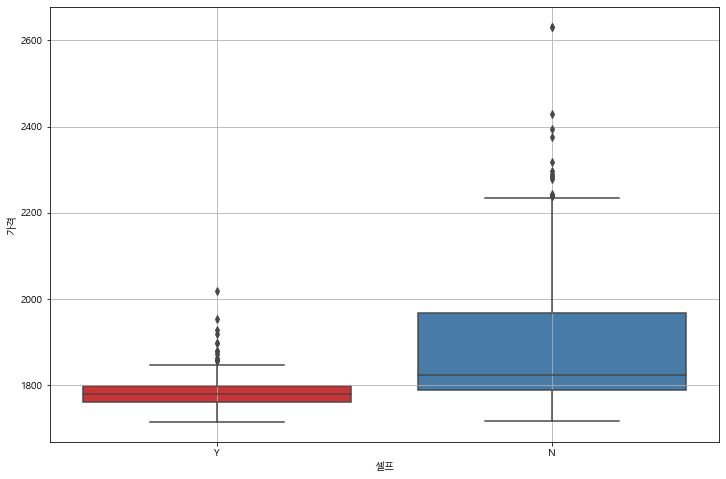

In [146]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x='셀프', y='가격', data = stations, palette='Set1')
plt.grid(True)
plt.show()

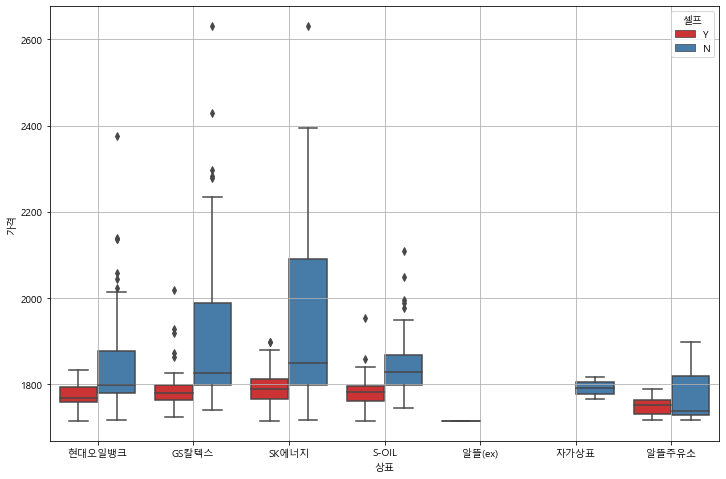

In [147]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set1' , )
plt.grid(True)
plt.show()

In [ ]:
# 지도 시각화

In [148]:
import json
import folium
import warnings # 경고문구가 나타나지 않음 / 어떤 경고 말하는거지?
warnings.simplefilter(action='ignore', category=FutureWarning)

In [149]:
# 가장 비싼 주유소 5개
stations.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
287,서남주유소,서울 중구 통일로 30,2631.0,N,SK에너지,중구
253,서계주유소,서울특별시 용산구 청파로 367 (청파동),2630.0,N,GS칼텍스,용산구
286,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
285,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2394.0,N,SK에너지,중구
461,제이제이주유소,서울 강남구 언주로 716,2375.0,N,현대오일뱅크,강남구


In [150]:
# 가장 싼 주유소
stations.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
70,만남의광장주유소,서울 서초구 양재대로12길 73-71,1714.0,Y,알뜰(ex),서초구
176,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1714.0,Y,SK에너지,양천구
177,현대주유소,서울 양천구 남부순환로 372 (신월동),1714.0,Y,S-OIL,양천구
411,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1715.0,Y,S-OIL,도봉구
410,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1715.0,Y,현대오일뱅크,도봉구


In [151]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1970.941176
강동구,1840.214286
강북구,1766.769231
강서구,1793.437500
관악구,1821.928571


In [157]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
my_map.choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns = [gu_data.index, '가격'],
    key_on = 'feature.id',
    fill_color = 'PuRd'
)
my_map